/Users/italo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


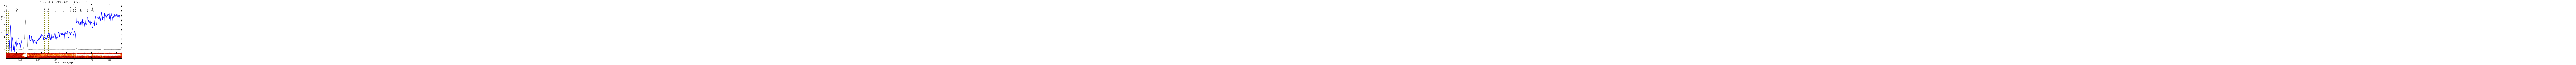

In [1]:
"""
Script to plot VIMOS LRb spectra
"""

from __future__ import division
import pyfits
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

%matplotlib inline

## for Helvetica and other sans-serif fonts use:
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# INPUT
idd = 'CLASHVLTJ041608.98-240607.0_2'
z = 0.3992
QF = 3
specfile = idd+'_1d.fits'
spec2Dfile = idd+'_2d.fits'

# ------------------------------------------------------------------------

#####################
# LRb Spectra
#####################

# Read Spectrum
hdu = pyfits.open(specfile)
# Read fluxes
fl = hdu[0].data
fl = fl.reshape(fl.shape[1]) * 1e18
#fl.shape
#(1, 650)
# Create wavelength vector
wl = hdu[0].header['CRVAL1'] +hdu[0].header['CDELT1'] * \
    (np.arange(fl.shape[0])+1 - hdu[0].header['CRPIX1'])

# Read Noise
# Read fluxes
fl_n = hdu[1].data
fl_n = fl_n.reshape(fl_n.shape[1]) * 1e18
# Create wavelength vector
wl_n = hdu[1].header['CRVAL1'] +hdu[1].header['CDELT1'] * \
    (np.arange(fl_n.shape[0])+1 - hdu[1].header['CRPIX1'])

# Read 2D spectrum
hdu_2D = pyfits.open(spec2Dfile)
# Read fluxes
fl_2D = hdu_2D[0].data
# Create wavelength vector
wl_2D = hdu_2D[0].header['CRVAL1'] +hdu_2D[0].header['CDELT1'] * \
    (np.arange(fl_2D.shape[1])+1 - hdu_2D[0].header['CRPIX1'])
fl_2D = fl_2D[:,19:624]  # cut wavelengths corresponding to 3596.39A and 6836.16A

# Read reference line wavelengths and labels
lines = ascii.read('lines_0.dat')
ww = np.array(lines["col1"])*(1+z)
ll = np.array(lines["col2"])

#####################
# PLOT 1D SPECTRUM
#####################

# Set the plot size in units of inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(10,5), dpi=100)

# Compute aspect ratio of 2D image
asprt = fl_2D.shape[0]/fl_2D.shape[1]
# Compute height in units of data xaxis [Ang]
ylen = hdu_2D[0].header['CDELT1']*fl_2D.shape[0]

# Add axes to figure
# [left, bottom, width, height] in fract. of figure width and height
ax = fig.add_axes([0.08, 0.09+asprt*2, 0.90, 0.95-(0.09+asprt*2)])
# Increase lenght and width of tick marks
ax.tick_params(which = 'major', length = 6, width = 1.2)
ax.tick_params(which = 'minor', length = 3, width = 1.2)
# Set plot limits
xmin = wl_2D[19]  # = 3596.39A
xmax = wl_2D[624] # = 6836.16A
ymin = min(fl)-abs(0.2*min(fl))
ymax = max(fl)+0.2*max(fl)
plt.axis([xmin, xmax, ymin, ymax])
# Set only the X axis limits
#plt.xlim(xmin,xmax)
# Set minor ticks of length 100 on both axes
xminorLocator = MultipleLocator(100)
#yminorLocator = MultipleLocator(100)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(xminorLocator)
#ax.yaxis.set_minor_locator(yminorLocator)

# Add vertical lines with labels
for j in range(len(ww)):
    ax.axvline(x=ww[j], ymin=0, ymax=0.84, linewidth=1,\
        linestyle='--', color='olive')
    ax.annotate(ll[j], xy=(ww[j], ymax*0.83), rotation=90,\
        horizontalalignment='center', verticalalignment='bottom',\
            fontsize=8)

# Plot spectrum 
ax.plot(wl, fl)
# Plot variance = noise^2
plt.plot(wl_n, fl_n**2, color='grey')
# Add minor ticks on both axis; default is 4-5 
ax.minorticks_on()

# X and Y axis Titles
idd0 = idd.split('_')
plt.title(idd0[0]+' $\;$ z='+str(z)+' $\;$ QF='+str(QF))
plt.ylabel('Flux [$\mathrm{10^{-18} \  erg \  s^{-1} \  cm^{-2} \  \AA^{-1}}$]')

# Remove labels on the x axis
ax.tick_params(axis='x', labelbottom='off')

#####################
# PLOT 2D SPECTRUM
#####################

# Add axes to figure
# [left, bottom, width, height] in fract. of figure width and height
ax2 = fig.add_axes([0.08, 0.095, 0.90, asprt*2])
# Increase lenght and width of tick marks
ax2.tick_params(which = 'major', length = 6, width = 1.2)
ax2.tick_params(which = 'minor', length = 3, width = 1.2)
ax2.imshow(fl_2D, cmap='gist_heat', vmin=-100, vmax=100, extent=[xmin,\
    xmax, 1, ylen])

# Set minor ticks of length 100 on both axes
xminorLocator = MultipleLocator(100)
#yminorLocator = MultipleLocator(100)
# for the minor ticks, use no labels; default NullFormatter
ax2.xaxis.set_minor_locator(xminorLocator)
#ax.yaxis.set_minor_locator(yminorLocator)

# Remove ticks and labels on the y axis
ax2.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    left='off',        # ticks along the left edge are off
    top='on',         # ticks along the top edge are off
    right='off',       # ticks along the right edge are off
    labelbottom='on', # labels along the bottom edge are off
    labelleft='off')   # labels along the left edge are off

plt.xlabel('Observed wavelength [$\mathrm{\AA}$]')

# Plot grid
#plt.grid(True)

# Plot legend
#plt.legend()

# Show the plot in GUI
plt.show()

# Save the plot to a png file
#plt.savefig(idd+'_spec.png', format='png')